<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter9_CaseStudy/run_model_kaggle_home_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
cd /gdrive/My Drive/Colab Notebooks/mlfbook-master/CaseStudy

/gdrive/My Drive/Colab Notebooks/mlfbook-master/CaseStudy


In [3]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from datetime import datetime
from functools import lru_cache
import os

input_dir = '/input'
output_dir = '/output'

if os.path.isdir(output_dir)==False:
  os.mkdir(output_dir)

  
from preprocessing import *
from model_helper import *
from model_train import *
from glob import glob

Using TensorFlow backend.


In [0]:
############ dfeault LGBM Model ############

_default_algo_params_lgbm = {'objective': 'binary',
          'metric': 'auc',
          'num_threads': 6,
          'num_iterations': 10000,
          'max_depth': 5,
          # 'num_leaves': 31,
          'learning_rate': 0.03,
          'bagging_fraction': 0.744,
          'feature_fraction': 0.268,
          'lambda_l1': 0.91,
          'lambda_l2': 0.89,
          'min_child_weight': 18.288,
          'min_gain_to_split': 0.0365,
          'verbose': -1,
          'silent': -1}

_default_fit_params_lgbm = {
    "eval_metric": 'auc',
    'verbose': 1000,
    'early_stopping_rounds': 100
}

_default_model_lgbm = {
                            'model': train_model_lgbm,
                            'algo_params':_default_algo_params_lgbm,
                            'fit_params':_default_fit_params_lgbm
}



############ dfeault Logistic Model ############
_default_algo_params_logistic = {
    'C':0.0001
}

_default_fit_params_logistic = None

_default_model_logistic = {
                            'model': train_model_logistic,
                            'algo_params':_default_algo_params_logistic,
                            'fit_params':_default_fit_params_logistic
}


############ dfeault NeuralNetwork Model ############

_default_algo_params_nn = {
    'units_init':400,
    'units_layers': [160,64,26,12],
    'kernel_initializer':'normal',
    'dropout':.3,
    'activation':'sigmoid',
    'optimizer':'adam',
    'loss':'binary_crossentropy',
    'metric':['acc']
}

_default_fit_params_nn = {
    'epochs':20,
    'batch_size':256,
    'verbose':2,
    'callbacks':[EarlyStopping(monitor='val_loss', patience=5)]
}

_default_model_neuralnetwork = {
                            'model': train_model_neuralnetwork,
                            'algo_params':_default_algo_params_nn,
                            'fit_params':_default_fit_params_nn
}

In [0]:
input_dir = 'input/'

def run_model(model_type,model_map,input_dir, output_dir):
    save_dir = '{}/model_{}/'.format(output_dir,model_type)
    print('------- run model: {} '.format(model_type))
    if model_type.lower() in ['lgbm']:
      x_train, x_test, y_train, ids = build_model_input(input_dir=input_dir)
    else:
      x_train, x_test, y_train, ids = build_model_input_extended(input_dir=input_dir)
    # get train results    
    res = train_results(x_train, x_test, y_train, ids, model_map[model_type])

    if len(glob(save_dir))==0:
      os.mkdir(save_dir)
    print('-------- save results to:{}'.format(model_type))
    save_training_results(res,model_type=model_type,save_dir=output_dir)

------- run model: lgbm 
Process application train and test...
Train samples: 307511, test samples: 48744


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(356255, 132)


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.808587	valid_1's auc: 0.771362
Early stopping, best iteration is:
[1126]	training's auc: 0.812231	valid_1's auc: 0.771517
Fold  1 AUC : 0.771517


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.810971	valid_1's auc: 0.762868
Early stopping, best iteration is:
[1289]	training's auc: 0.81954	valid_1's auc: 0.763302
Fold  2 AUC : 0.763302


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.809976	valid_1's auc: 0.769673
Early stopping, best iteration is:
[1349]	training's auc: 0.82004	valid_1's auc: 0.770369
Fold  3 AUC : 0.770369


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.806955	valid_1's auc: 0.776455
Early stopping, best iteration is:
[1391]	training's auc: 0.818549	valid_1's auc: 0.777497
Fold  4 AUC : 0.777497


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.810969	valid_1's auc: 0.765134
Early stopping, best iteration is:
[1381]	training's auc: 0.821538	valid_1's auc: 0.76578
Fold  5 AUC : 0.765780
AUC score of oof prediction 0.769645
AUC of cross validation 0.769693


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.808587	valid_1's auc: 0.771362
Early stopping, best iteration is:
[1126]	training's auc: 0.812231	valid_1's auc: 0.771517
Fold  1 AUC : 0.771517


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.810971	valid_1's auc: 0.762868
Early stopping, best iteration is:
[1289]	training's auc: 0.81954	valid_1's auc: 0.763302
Fold  2 AUC : 0.763302


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.809976	valid_1's auc: 0.769673
Early stopping, best iteration is:
[1349]	training's auc: 0.82004	valid_1's auc: 0.770369
Fold  3 AUC : 0.770369


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.806955	valid_1's auc: 0.776455
Early stopping, best iteration is:
[1391]	training's auc: 0.818549	valid_1's auc: 0.777497
Fold  4 AUC : 0.777497


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[1000]	training's auc: 0.810969	valid_1's auc: 0.765134
Early stopping, best iteration is:
[1381]	training's auc: 0.821538	valid_1's auc: 0.76578
Fold  5 AUC : 0.765780
Full AUC score 0.769645
-------- save results to:lgbm


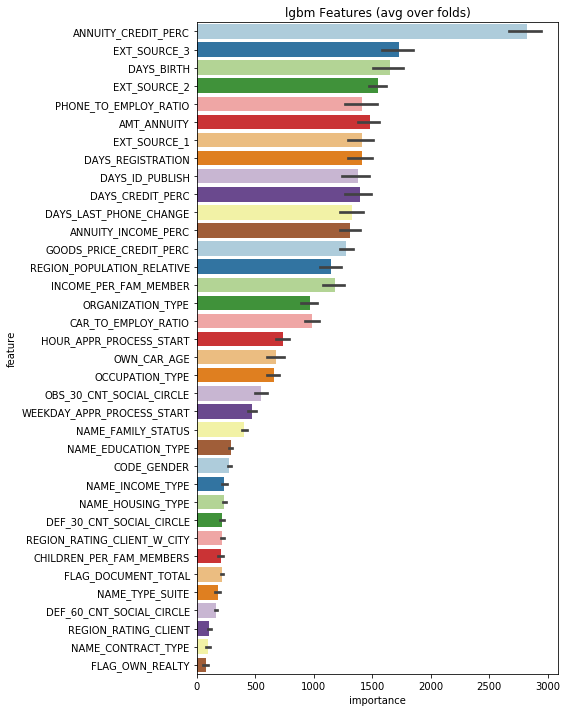

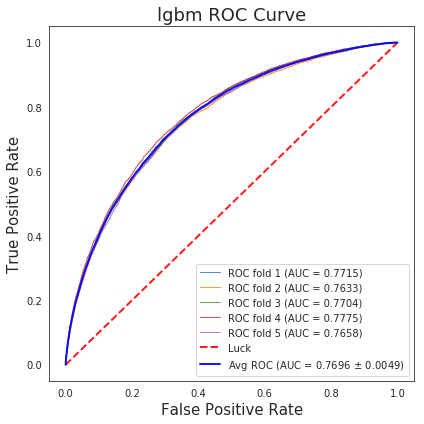

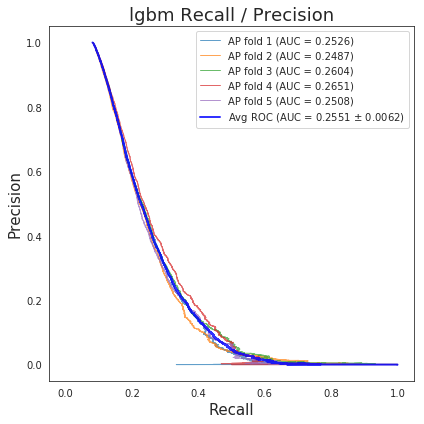

In [6]:
model_map = {
    'logistic': _default_model_logistic,
    'neuralnetwork':_default_model_neuralnetwork,
    'lgbm':_default_model_lgbm}


run_model('lgbm',model_map,input_dir, output_dir)